<a href="https://colab.research.google.com/github/I3ryI3e/fantastic-octo-barnacle/blob/master/RNNCrypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

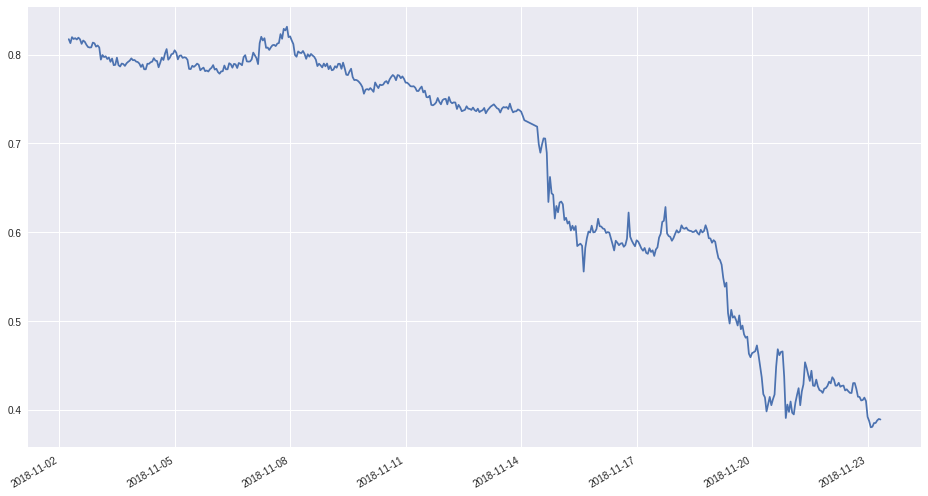

In [1]:
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
import pandas as pd    # for storing and manipulating the data we get back
import numpy as np     # numerical python, i usually need this somewhere 
                       # and so i import by habit nowadays

import matplotlib.pyplot as plt # for charts and such
    
import datetime as dt  # for dealing with times

def get_bars(symbol, interval = '1h'):
   root_url = 'https://api.binance.com/api/v1/klines'
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

steemeth = get_bars('STEEMETH')
ethusdt = get_bars('ETHUSDT')
steemusdt = steemeth['c'].astype('float') * ethusdt['c'].astype('float')

steemusdt.plot(figsize=(16,9))